In [1]:
import eikon as ek
import numpy as np
import pandas as pd
from matplotlib import rc
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
plt.style.use('classic')
rc('text', usetex=True)
rc('font', size=14)
rc('legend', fontsize=13)

from aux import Aux
aux = Aux()

In [102]:
api_key = '4019aab16a6b45cf86e11574d74e2e5b3681ee13'

# Production, Manufacturing
USIPMANG = "aUSIPMANG/CA"
# Disposable Income: United States, Personal Income Account, Disposable Personal Income, Total, Current Prices, AR, SA, USD
USGPYD = "aUSGPYD"
# Manufacturing: United States, Machinery manufacturing, Not SA, Index, 2003M12=100
USPPM  = "USPPM=ECI"
# United States, Hours Worked, Average Per Week, Nonfarm payrolls, all employees, total private, SA
USWRKW = "USWRKW=ECI"

columns = [USIPMANG, USGPYD, USPPM, USWRKW]
ek.set_app_key(api_key)
Z = ek.get_timeseries(columns,
start_date='2000-12-15',
end_date='2022-8-31',
interval='monthly').apply(lambda x : aux.dt_idx(x))
Z.columns = ["USIPMANG", "USGPYD", "USPPM", "USWRKW"]
Z.to_csv(aux.find("newdata.csv", "data"))

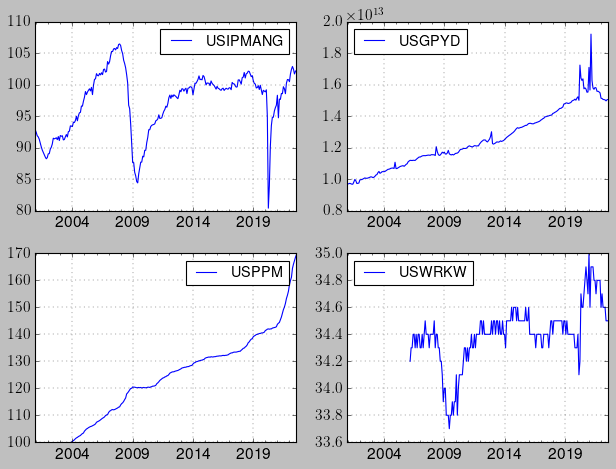

In [2]:
df = pd.read_csv(aux.find("newdata.csv", "data"), index_col="Date")#.dropna()#.apply(lambda x : aux.dt_idx(x))
df.index = pd.to_datetime(df.index)
df.index.name = None
# Initiate the figure:
fig, axs = plt.subplots(nrows=2, ncols=2)
fig.tight_layout()
# Plot everything in four different subplots
df.USIPMANG.plot(ax=axs[0,0], legend='USIPMANG')
df.USGPYD.plot(ax=axs[0,1], legend='USGPYD')
df.USPPM.plot(ax=axs[1,0], legend='USPPM')
df.USWRKW.plot(ax=axs[1,1], legend='USWRKW')
#years = pd.to_datetime(list(set(df.index.year)), format="%Y").strftime("%Y")

# Plot grids:
for i in range(2):
    for j in range(2):
        axs[i,j].grid(linewidth=0.3)
        #axs[i,j].set_xlim([d.index[0], df.index[-1]])
name = "newdata.eps"
aux.save_myfig(name,fig)

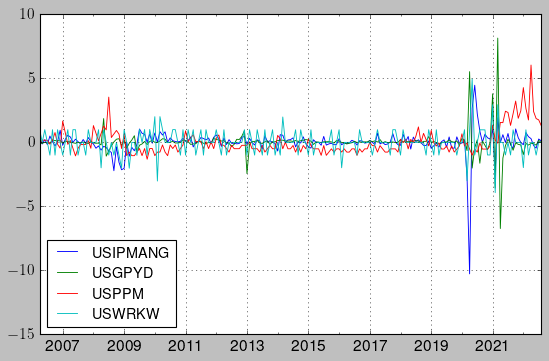

In [139]:
standardised_df = aux.standardise(aux.Δ(aux.log_df(df)))

fig=aux.aurum_fig()
ax=fig.gca()
standardised_df.plot(ax=ax, linewidth=0.8)
ax.grid()
name = "standardised_newdata.eps"
aux.save_myfig(name, fig)

In [101]:
df

,USIPMANG,USGPYD,USPPM,USWRKW
2014-12-31,4.618023,30.207483,4.872905,3.543854
2015-01-31,4.612225,30.213106,4.875960,3.540959
2015-02-28,4.604825,30.216663,4.877485,3.543854
2015-03-31,4.607972,30.213785,4.878246,3.540959
2015-04-30,4.607622,30.215985,4.879007,3.540959
...,...,...,...,...
2022-04-30,4.633788,30.342743,5.102546,3.543854
2022-05-31,4.629632,30.341494,5.111988,3.543854
2022-06-30,4.622157,30.337275,5.119789,3.540959
2022-07-31,4.626253,30.342342,5.127292,3.540959
